In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_excel("Mother Jones - Mass Shootings Database, 1982 - 2023.xlsx")
df

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,New Mexico neighborhood shooting,"Farmington, New Mexico",5/15/23,"Beau Wilson, 18, opened fire in a residential ...",3,6,9,Other,18,yes,...,AR-15-style rifle,White,M,https://www.cbsnews.com/news/farmington-shooti...,https://www.nbcnews.com/news/us-news/beau-wils...,-,-,-,mass,2023
1,Texas outlet mall shooting,"Allen, Texas",2023-06-05 00:00:00,"Mauricio Garcia, 33, wore tactical gear and us...",8,7,15,Other,33,yes,...,AR-15-style rifle,Latino,M,https://www.nytimes.com/2023/05/07/us/texas-ma...,-,-,-,-,Mass,2023
2,Louisville bank shooting,"Louisville, Kentucky",2023-10-04 00:00:00,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,...,AR-15 rifle,White,M,https://apnews.com/article/downtown-louisville...,-,-,-,-,Mass,2023
3,Nashville Christian school shooting,"Nashville, Tennessee",3/27/23,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,...,-,White,"F (""identifies as transgender"" and ""Audrey Hal...",https://www.tennessean.com/story/news/crime/20...,-,-,-,-,Mass,2023
4,Michigan State University shooting,"East Lansing, Michigan",2/13/23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,-,Black,M,https://www.cnn.com/us/live-news/michigan-stat...,-,-,-,-,Mass,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Shopping centers spree killings,"Palm Bay, Florida",4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,"Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.033189,-80.64297,Spree,1987
140,United States Postal Service shooting,"Edmond, Oklahoma",8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.667201,-97.42937,Mass,1986
141,San Ysidro McDonald's massacre,"San Ysidro, California",7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.552001,-117.043081,Mass,1984
142,Dallas nightclub shooting,"Dallas, Texas",6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m/%d/%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              144 non-null    object
 1   location                          144 non-null    object
 2   date                              144 non-null    object
 3   summary                           144 non-null    object
 4   fatalities                        144 non-null    int64 
 5   injured                           144 non-null    int64 
 6   total_victims                     144 non-null    int64 
 7   location.1                        144 non-null    object
 8   age_of_shooter                    144 non-null    object
 9   prior_signs_mental_health_issues  144 non-null    object
 10  mental_health_details             144 non-null    object
 11  weapons_obtained_legally          144 non-null    object
 12  where_obtained        

In [6]:
df.describe()

,fatalities,injured,total_victims,year
count,144.000000,144.000000,144.000000,144.000000
mean,7.756944,11.152778,18.909722,2010.645833
std,7.398967,46.086619,51.203954,10.834721
min,3.000000,0.000000,3.000000,1982.000000
25%,4.000000,1.000000,6.000000,2005.000000
50%,6.000000,3.000000,10.000000,2015.000000
75%,8.000000,10.000000,17.000000,2019.000000
max,58.000000,546.000000,604.000000,2023.000000


In [7]:
df.isnull().sum()

case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      1
race                                0
gender                              0
sources                             0
mental_health_sources               0
sources_additional_age              0
latitude                            0
longitude                           0
type                                0
year                                0
dtype: int64

In [8]:
df.replace('-', np.nan, inplace=True)

In [9]:
df.isnull().sum()

case                                 0
location                             0
date                                 0
summary                              0
fatalities                           0
injured                              0
total_victims                        0
location.1                           0
age_of_shooter                       2
prior_signs_mental_health_issues    28
mental_health_details               44
weapons_obtained_legally            16
where_obtained                      48
weapon_type                          0
weapon_details                      26
race                                12
gender                               0
sources                              0
mental_health_sources               57
sources_additional_age              44
latitude                            18
longitude                           18
type                                 0
year                                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')

In [13]:
df.shape

(144, 24)

In [14]:
df.where_obtained.unique()

array([nan, 'gun dealership in Louisville',
       "Dance's Sporting Goods; Colonial Heights, VA", 'in Greenwood',
       'legally purchased by the shooter in the "greater Chicago area" per authorities',
       'Nevada, on July 9', 'A gun store in Simi Valley',
       '(Unclear; investigators confirmed he owned 10 guns in total, all purchased and possessed legally, and had a handgun license)',
       'A local gun store', "Father's weapons", 'Family member', 'TBD',
       'A Florida pawn shop',
       'Purchased in April 2016 from an Academy Sports & Outdoors store in San Antonio',
       'Unclear', 'Two gun shops in Nevada',
       'Unclear; the firearm was stolen in Utah. A second handgun Lam had (also stolen) was unused in the attack.',
       'online and or gun show',
       'Shooting center in Port St. Lucie, Florida',
       'The suspects purchased their handguns in the United States; the assault rifles were purchased by a third party.',
       'From the home he shared with his mo

In [15]:
df.where_obtained.nunique()

76

In [16]:
df.case.unique()

array(['New Mexico neighborhood shooting', 'Texas outlet mall shooting',
       'Louisville bank shooting', 'Nashville Christian school shooting',
       'Michigan State University shooting',
       'Half Moon Bay spree shooting', 'LA dance studio mass shooting',
       'Virginia Walmart shooting', 'LGBTQ club shooting',
       'University of Virginia shooting', 'Raleigh spree shooting',
       'Greenwood Park Mall shooting',
       'Highland Park July 4 parade shooting',
       'Church potluck dinner shooting', 'Concrete company shooting',
       'Tulsa medical center shooting', 'Robb Elementary School massacre',
       'Buffalo supermarket massacre',
       'Sacramento County church shooting', 'Oxford High School shooting',
       'San Jose VTA shooting', 'FedEx warehouse shooting',
       'Orange office complex shooting', 'Boulder supermarket shooting',
       'Atlanta massage parlor shootings',
       'Springfield convenience store shooting', 'Molson Coors shooting',
       'Jersey

In [17]:
df.case = df.case.str.strip().str.capitalize()

In [18]:
df.location.unique()
df.location = df.location.str.strip().str.capitalize()

In [19]:
most_common_location = df['location'].value_counts().head(5)
print("State with the most occurrences:", most_common_location)

State with the most occurrences: Colorado springs, colorado    3
Fort hood, texas              2
Dallas, texas                 2
Atlanta, georgia              2
Orange, california            2
Name: location, dtype: int64


In [20]:
location_with_most_victims = df.groupby('location')['total_victims'].sum().head(5)
most_victims_count = df.groupby('location')['total_victims'].sum().max()
print("Location with the most victims:", location_with_most_victims)

Location with the most victims: location
Aiken, south carolina     7
Allen, texas             15
Alturas, california       6
Annapolis, maryland       7
Atlanta, georgia         31
Name: total_victims, dtype: int64


In [21]:
df.race.unique()

array(['White', 'Latino', 'Black', 'Asian', nan, 'Other',
       'Native American', 'white', 'black', 'unclear'], dtype=object)

In [22]:
df.race = df.race.str.strip()

In [23]:
df.replace('-', np.nan, inplace=True)

In [24]:
df.loc[df.injured.isnull()]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year


In [25]:
df.loc[df.fatalities.isnull()]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year


In [26]:
df.loc[df.total_victims.isnull()]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year


In [27]:
# Calculate the total sum of fatalities over the years
total_fatalities = df['fatalities'].sum()
print("Total Fatalities:", total_fatalities)

Total Fatalities: 1117


In [28]:
# Calculate the total sum of injuries over the years
total_injured = df['injured'].sum()
print("Total Injured:", total_injured)

Total Injured: 1606


In [29]:
# Calculate the sum total of victims over the years
Total_victims = df['total_victims'].sum()
print("Total Victims:", Total_victims)

Total Victims: 2723


In [31]:
df.drop('weapons_obtained_legally', axis=1, inplace=True)

In [39]:
df.drop('mental_health_sources', axis=1, inplace=True)

In [32]:
df.drop('mental_health_details', axis=1, inplace=True)

In [33]:
df.drop('sources_additional_age', axis=1, inplace=True)

In [41]:
df.drop('weapon_type', axis=1, inplace=True)

In [42]:
df.drop('weapon_details', axis=1, inplace=True)

In [ ]:
df.drop('sources', axis=1, inplace=True)

In [35]:
df.drop('longitude', axis=1, inplace=True)

In [36]:
df.drop('latitude', axis=1, inplace=True)

In [37]:
df.drop('location.1', axis=1, inplace=True)

In [43]:
df.head(5)

,case,location,date,summary,fatalities,injured,total_victims,age_of_shooter,prior_signs_mental_health_issues,where_obtained,race,gender,type,year
0,New mexico neighborhood shooting,"Farmington, new mexico",05/15/2023,"Beau Wilson, 18, opened fire in a residential ...",3,6,9,18.0,yes,NaN,White,M,mass,2023
1,Texas outlet mall shooting,"Allen, texas",06/05/2023,"Mauricio Garcia, 33, wore tactical gear and us...",8,7,15,33.0,yes,NaN,Latino,M,Mass,2023
2,Louisville bank shooting,"Louisville, kentucky",10/04/2023,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,25.0,yes,gun dealership in Louisville,White,M,Mass,2023
3,Nashville christian school shooting,"Nashville, tennessee",03/27/2023,"Audrey Hale, 28, who was a former student at t...",6,6,12,28.0,NaN,NaN,White,"F (""identifies as transgender"" and ""Audrey Hal...",Mass,2023
4,Michigan state university shooting,"East lansing, michigan",02/13/2023,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,43.0,NaN,NaN,Black,M,Mass,2023


Text(0.5, 1.0, 'Fatalities Per Year')

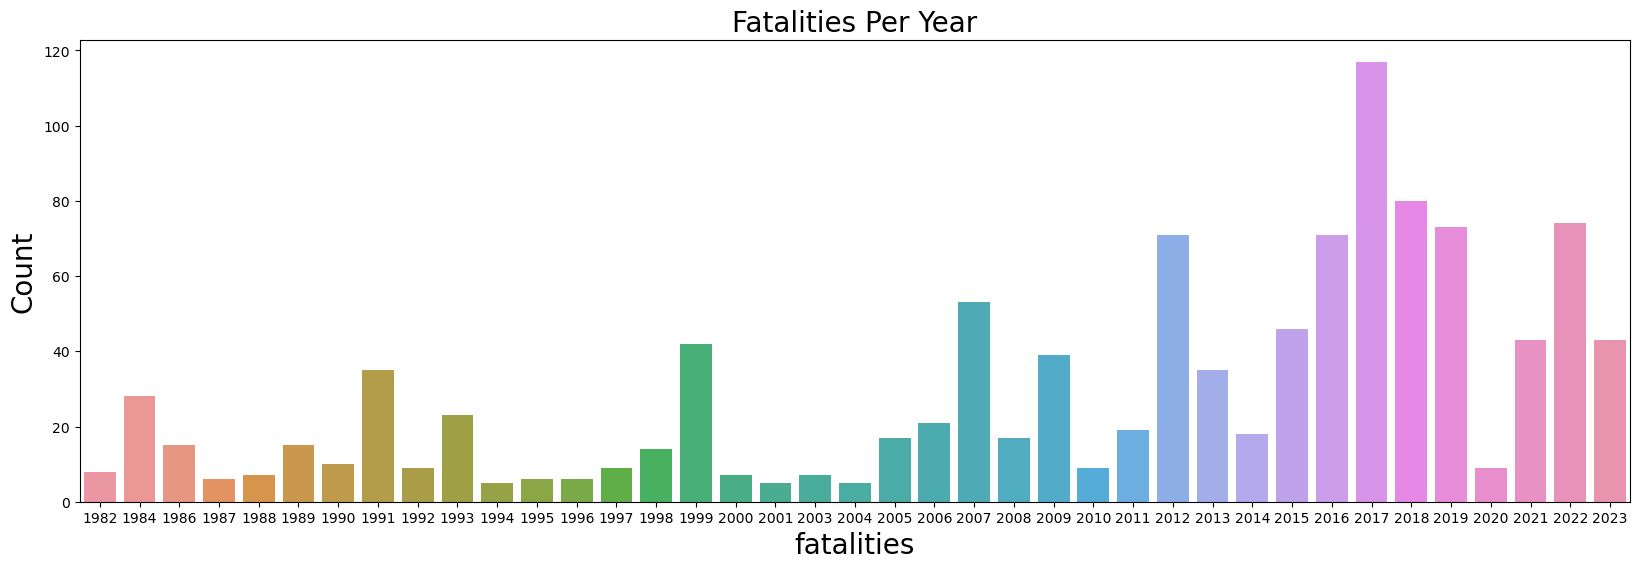

In [44]:
#To show the rate of fatalities over the years
fatalities_per_year = df.groupby("year")["fatalities"].sum()
plt.figure(figsize=(20, 6))
sns.barplot(x=fatalities_per_year.index, y=fatalities_per_year.values)
plt.xlabel("fatalities", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Fatalities Per Year", fontsize=20)

Text(0.5, 1.0, 'Injuries Per Year')

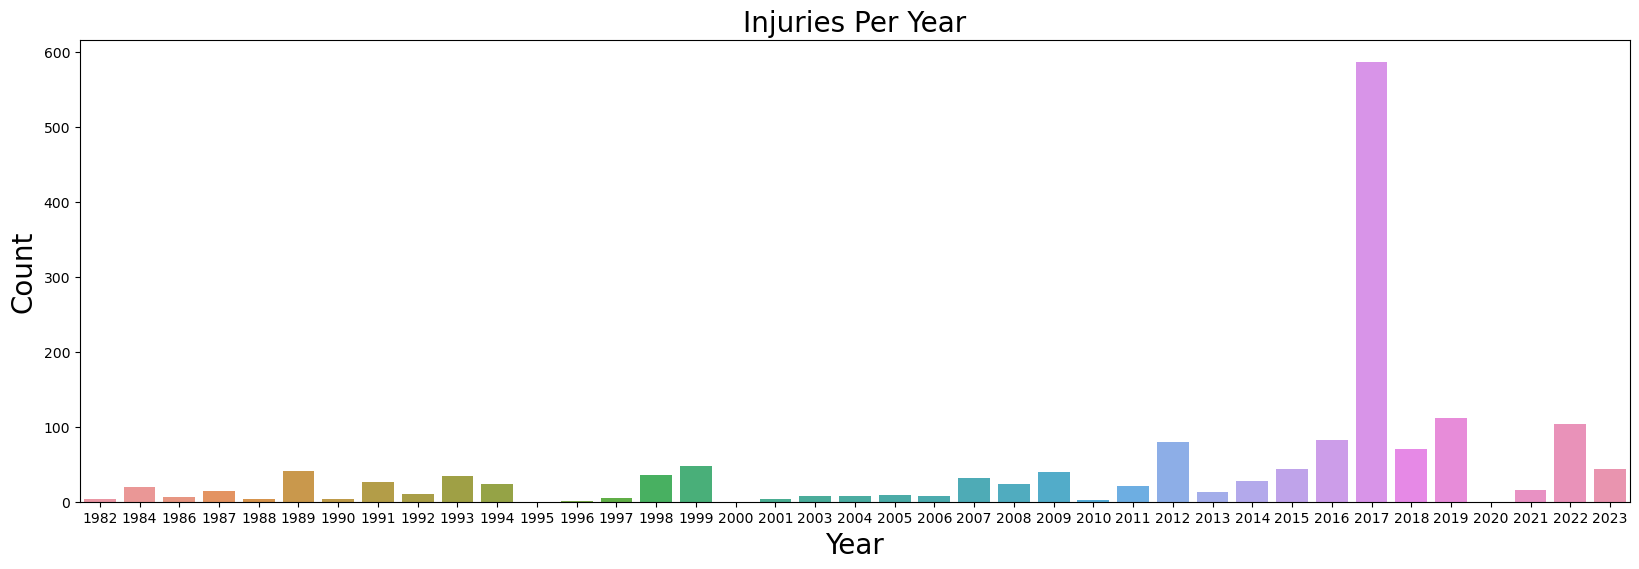

In [47]:
#To show the rate of injuries over the years
injuries_per_year = df.groupby("year")["injured"].sum()
plt.figure(figsize=(20, 6))
sns.barplot(x=injuries_per_year.index, y=injuries_per_year.values)
plt.xlabel("Year", fontsize=20)  
plt.ylabel("Count", fontsize=20)
plt.title("Injuries Per Year", fontsize=20)

In [48]:
#Find out the total no of injuries in 2020
injuries_2020 = df[df["year"] == 2020]
total_injuries_2020 = injuries_2020["injured"].sum()
print("Total Injuries in 2020:", total_injuries_2020)

Total Injuries in 2020: 0


In [54]:
#splitting Date column into month, day and year 
df[["Month","Day","Year"]] = df["date"].str.split("/",expand=True)

In [55]:
deadly_month = df.groupby("Month")["Month"].count()

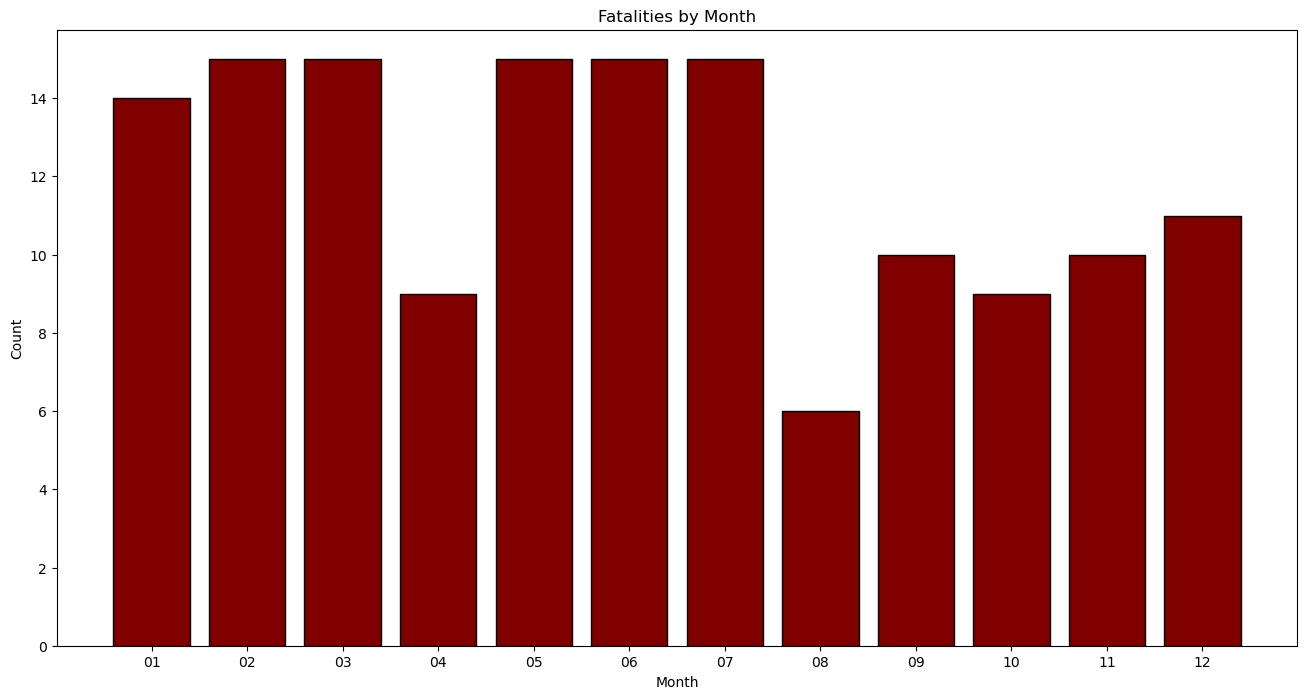

In [57]:
#Frequency of attacks in a month
plt.figure(figsize=(16, 8))
plt.bar(deadly_month.index, deadly_month.values, color="maroon", edgecolor="black")
plt.xlabel("Month", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Fatalities by Month", fontsize=12)
plt.show()

In [58]:
#Frequency of attacks per year
deadly_year = df.groupby("year")["year"].count()

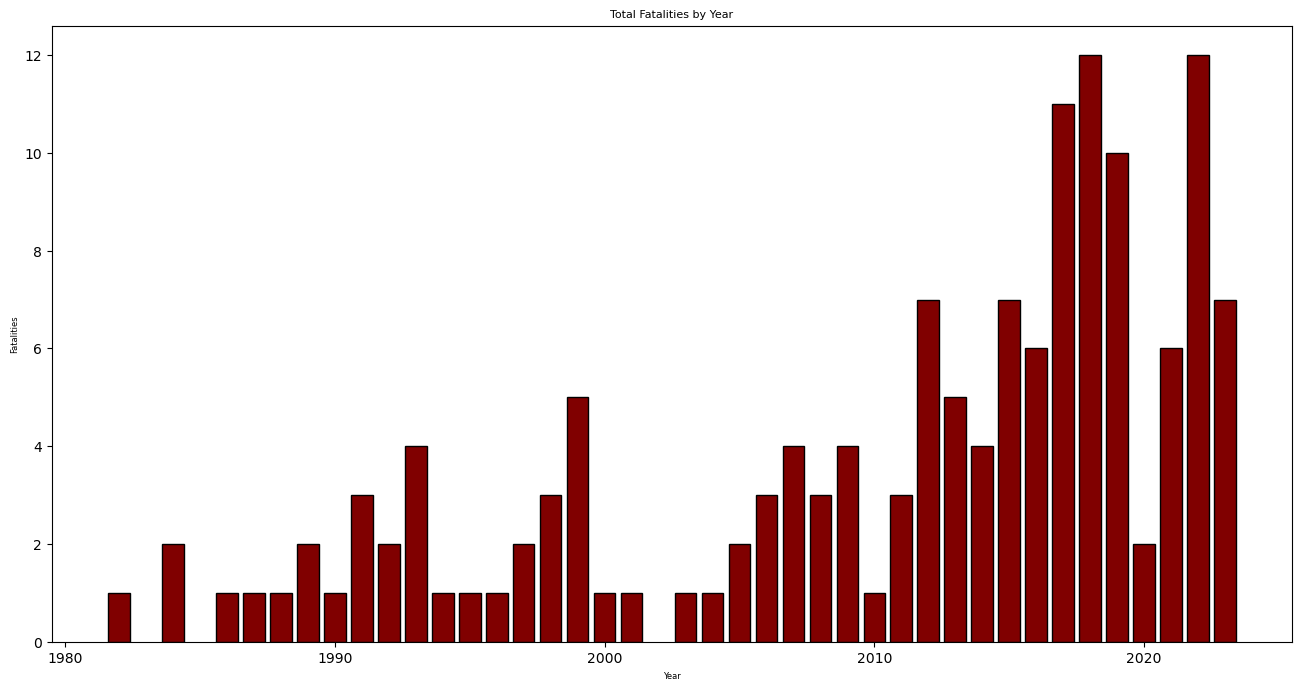

In [59]:
plt.figure(figsize=(16, 8))
plt.bar(deadly_year.index, deadly_year.values, color="maroon", edgecolor="black")
plt.xlabel("Year", fontsize=6)
plt.ylabel("Fatalities", fontsize=6)
plt.title("Total Fatalities by Year", fontsize=8)
plt.show()

In [60]:
#check the total no of fatalities in 2002
fatalities_2002 = df[df["year"] == 2002]
total_fatalities_2002 = fatalities_2002["fatalities"].sum()
print("Total fatalities in 2002:", total_fatalities_2002)

Total fatalities in 2002: 0


In [62]:
df.groupby('year')[['total_victims', 'injured', 
                    'fatalities']].sum().sort_values(['total_victims'],
                     ascending=False).head(15).style.background_gradient(cmap='Reds')

,total_victims,injured,fatalities
year,,,
2017,704,587,117
2019,185,112,73
2022,178,104,74
2016,154,83,71
2012,151,80,71
2018,150,70,80
1999,89,47,42
2015,89,43,46
2023,86,43,43


In [63]:
df["gender"].value_counts()

Male                                                                                                                                                                     70
M                                                                                                                                                                        68
Male & Female                                                                                                                                                             2
Female                                                                                                                                                                    2
F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)     1
F                                                                                                                                           

In [66]:
df["Gender"]= df.Gender.replace("M","Male")
df["Gender"]= df.Gender.replace("F","Female")
df["Gender"]= df.Gender.replace("M/F","Male/Female")
df['Gender']= df['Gender'].replace('F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)', 'Transgender')

In [67]:
df["Gender"].value_counts()

Male             138
Female             3
Male & Female      2
Transgender        1
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution of shooters')

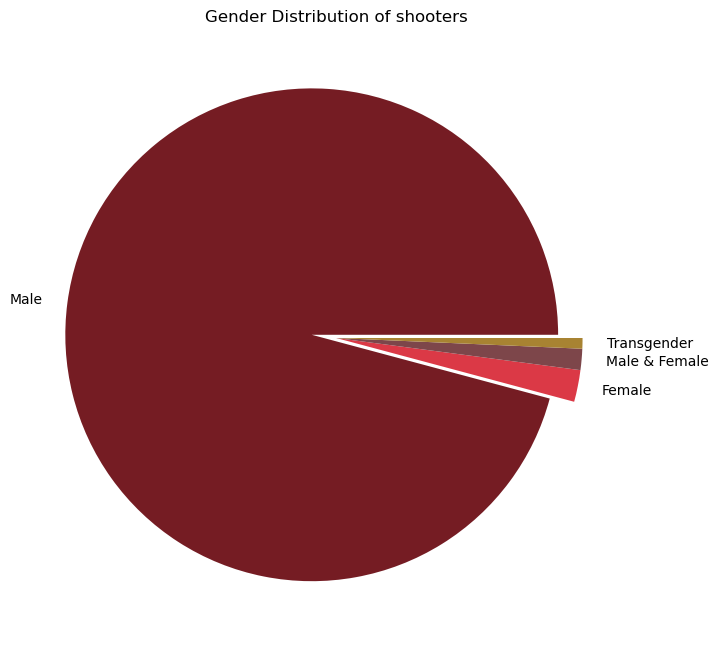

In [68]:
#pie chart representation of shooters
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(10, 8))
gender = df["Gender"].value_counts()
plt.pie(gender.values, labels = gender.index, explode = [0.1, 0.0, 0.0, 0.0], colors = ['#751c23','#db3946','#7d464a', "#a88332"])
plt.title("Gender Distribution of shooters")

Text(0.5, 1.0, 'Distribution of Gender Percentages')

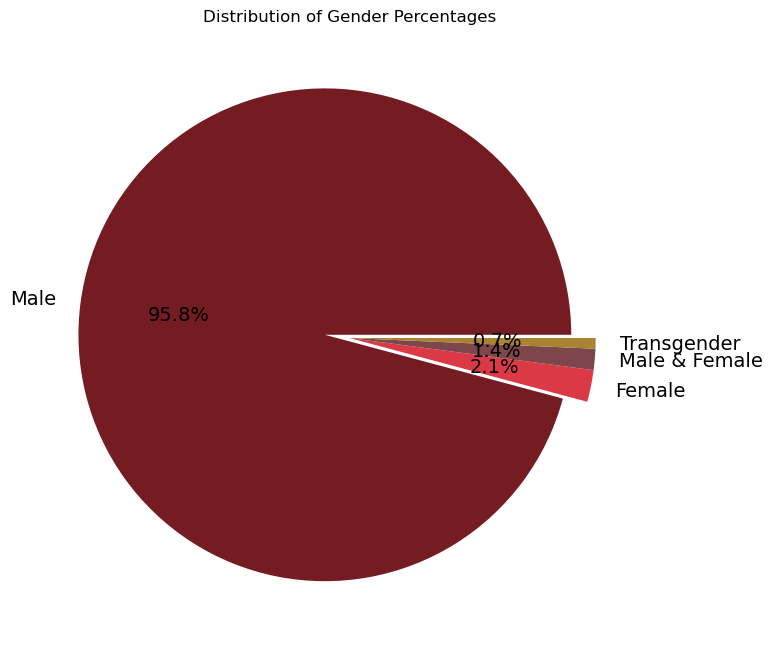

In [69]:
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(10, 8))
gender = df["Gender"].value_counts()
plt.pie(gender.values, labels=gender.index, explode=[0.1, 0.0, 0.0, 0.0], colors=['#751c23', '#db3946', '#7d464a', "#a88332"], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Distribution of Gender Percentages")

In [70]:
df["race"] = df["race"].str.capitalize()
race= df["race"].value_counts()
race

White              76
Black              25
Latino             12
Asian              10
Other               5
Native american     3
Unclear             1
Name: race, dtype: int64

<Axes: xlabel='race', ylabel='count'>

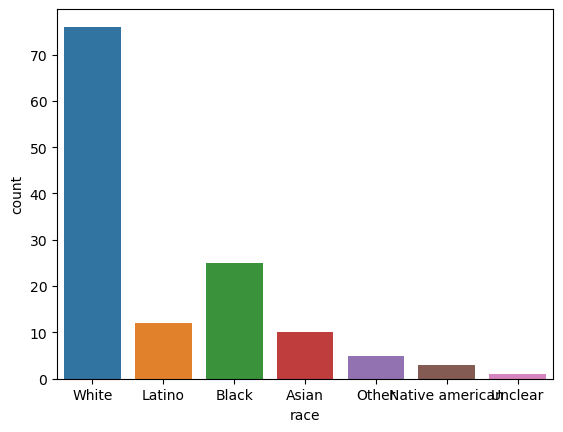

In [71]:
sns.countplot(x='race', data=df)

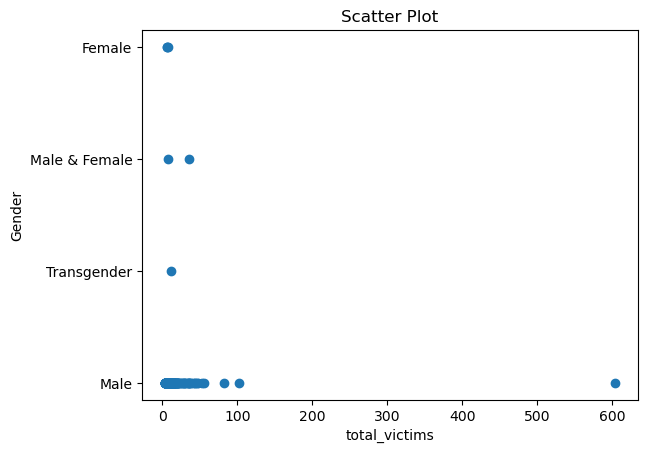

In [72]:
# Scatter plot 
plt.scatter(df['total_victims'], df['Gender'])
 
# Add title to the Plot
plt.title("Scatter Plot")
 
# Set the X and Y labels
plt.xlabel('total_victims')
plt.ylabel('Gender')
 
plt.show()

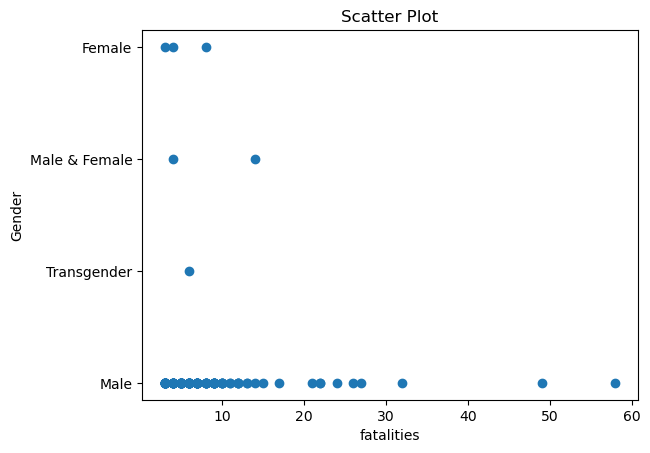

In [73]:
# Scatter plot 
plt.scatter(df['fatalities'], df['Gender'])
 
# Add title to the Plot
plt.title("Scatter Plot")
 
# Set the X and Y labels
plt.xlabel('fatalities')
plt.ylabel('Gender')
 
plt.show()

<Axes: xlabel='prior_signs_mental_health_issues', ylabel='Count'>

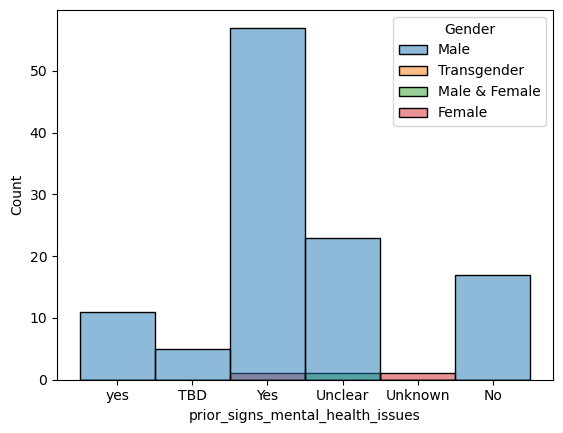

In [74]:
sns.histplot(data=df, x='prior_signs_mental_health_issues', hue='Gender')

In [77]:
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].replace({'yes': 'Yes'})

Text(0, 0.5, 'Count')

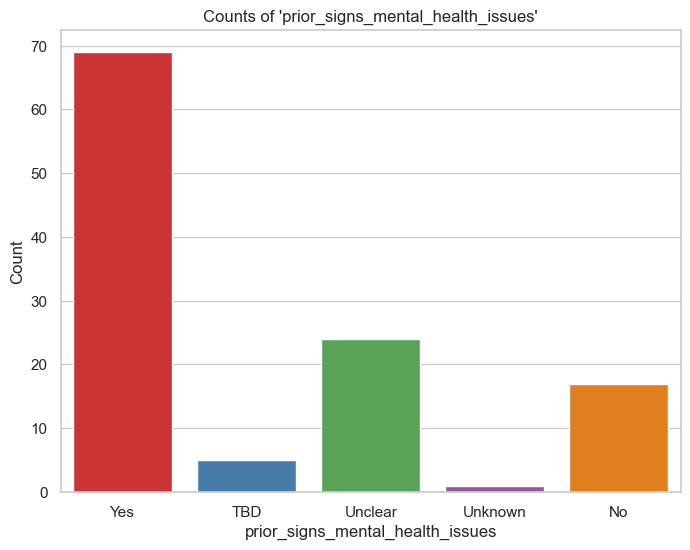

In [78]:
# Create a count plot for 'prior_signs_mental_health_issues'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='prior_signs_mental_health_issues', palette="Set1")
plt.title("Counts of 'prior_signs_mental_health_issues'")
plt.xlabel("prior_signs_mental_health_issues")
plt.ylabel("Count")

<Axes: xlabel='type', ylabel='count'>

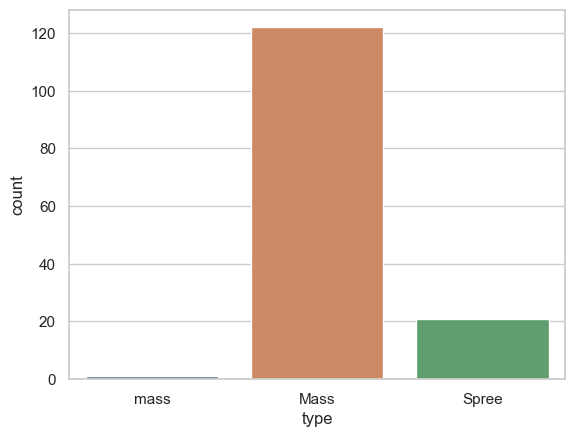

In [79]:
sns.countplot(x='type', data=df)

In [80]:
df['type'] = df['type'].replace({'mass': 'Mass'})

<Axes: xlabel='type', ylabel='count'>

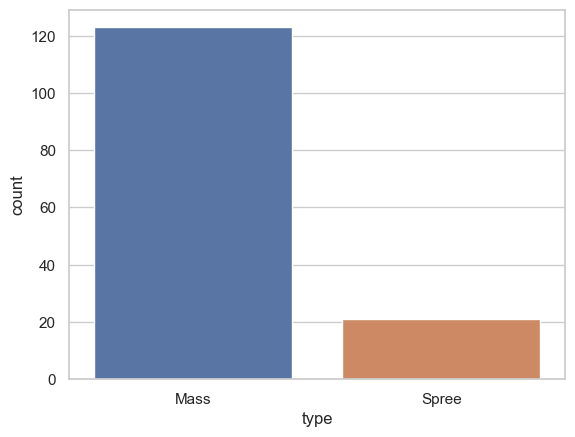

In [81]:
sns.countplot(x='type', data=df)

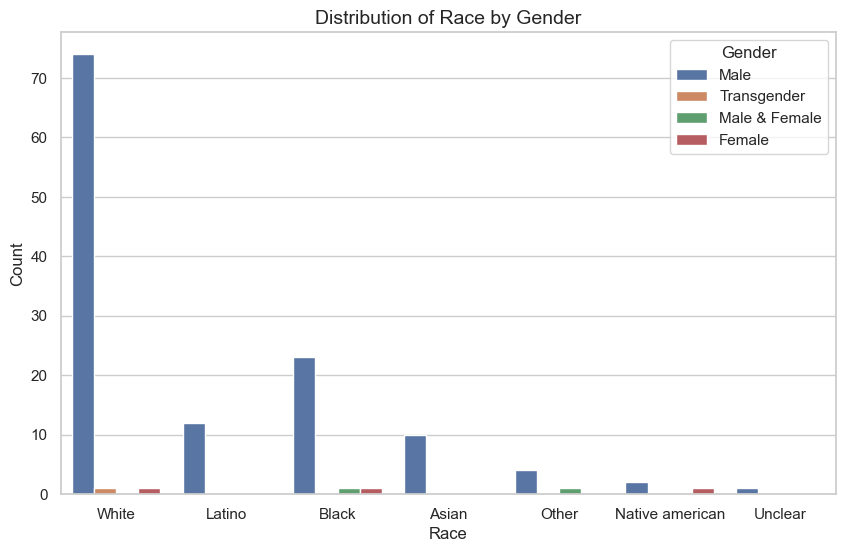

In [82]:
#countplot of race and gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='Gender', data=df)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Race by Gender', fontsize=14)
plt.show()

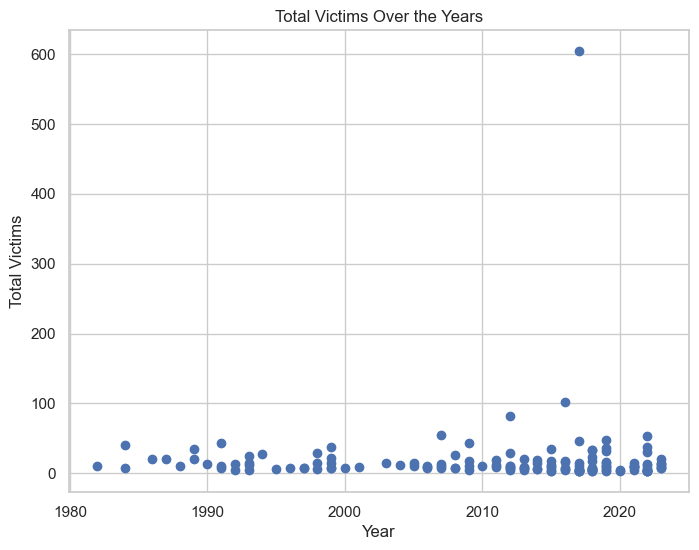

In [83]:
#Scatter Plot of Total Victims Over the Years
plt.figure(figsize=(8, 6))
plt.scatter(df['year'], df['total_victims'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.title('Total Victims Over the Years')
plt.show()

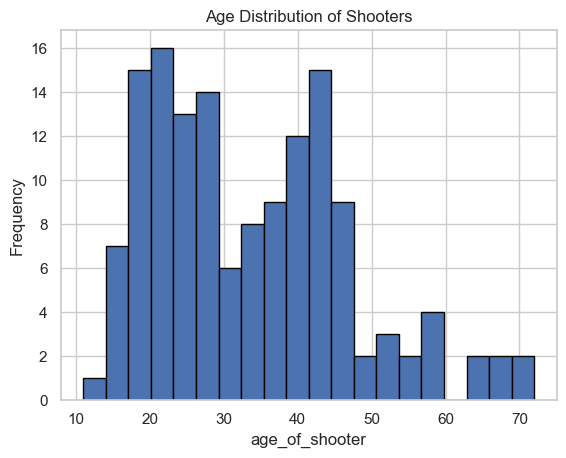

In [84]:
# Create a histogram highlighting age of shooters
plt.hist(df['age_of_shooter'], bins=20, edgecolor='black')
plt.xlabel('age_of_shooter')
plt.ylabel('Frequency')
plt.title('Age Distribution of Shooters')
plt.show()